# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Gerard Julian]
- **Email:** [gerardjulian2404@gmail.com]
- **ID Dicoding:** [gerard_julian_wLVm]

## Menentukan Pertanyaan Bisnis

- Pada musim apakah iklan akan lebih efektif karena rental sepeda lebih diminati? (Prediksi berdasarkan data pada tahun 2011)

- Menganalisis apakah tren rental sepeda cenderung naik seiring berjalannya waktu untuk memulai bisnis rental sepeda sebagai pesaing. (Prediksi berdasarkan data pada tahun 2011 dan 2012)

## Import Semua Packages/Library yang Digunakan

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Data Wrangling

### Gathering Data

In [14]:
dfday = pd.read_csv('day.csv')
dfhour = pd.read_csv('hour.csv')

In [15]:
print(dfday.head()) #Mengecek apakah file csv sudah dapat terbaca

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [16]:
print(dfhour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Program telah berhasil membaca csv day dan hour dan dicoba untuk menampilkan 5 baris pertama dengan fungsi head

### Assessing Data

In [17]:
dfday.info() #menampilkan data pada day.csv (terdapat 731 data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [18]:
dfday.isnull().sum() #Memeriksa missing value pada kolom data day.csv

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [20]:
dfday.duplicated().sum() #memeriksa duplicate data pada kolom data day.csv

0

In [21]:
dfday.describe() #memberikan gambaran mengenai data pada day.csv

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
dfhour.info()#menampilkan data pada hour.csv (terdapat 17379 data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [23]:
dfhour.isnull().sum() #Memeriksa missing value pada kolom data hour.csv

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [24]:
dfhour.duplicated().sum() #memeriksa duplicate data pada kolom data hour.csv

0

In [57]:
dfhour.describe() #memberikan gambaran mengenai data pada hour.csv

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kita telah melakukan assesing data yaitu mengecek apakah ada missing value ataupun duplicate data. hasil yang didapat adalah data aman dengan 0 missing value dan 0 duplicate data.


### Cleaning Data

**Insight:**
- Karena data pada day.csv dan hour.csv tidak memiliki missing value atau duplicate data maka kita dapat melewati tahap cleaning data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [72]:
# Bussiness case 1
df2011 = dfday[dfday['yr'] == 0]


In [102]:
season_rentals = df2011.groupby('season')['cnt'].sum().reset_index() # group jumlah rental berdasarkan musim


In [95]:
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'} #menamai musim sesuai panduan readme.txt
season_rentals['season_name'] = season_rentals['season'].map(season_names) #maping rental per musim

In [76]:
print(season_rentals[['season_name', 'cnt']].sort_values('cnt', ascending=False)) # membuat tabel berdasarkan jumlah rental terbanyak


  season_name     cnt
2        Fall  419650
1      Summer  347316
3      Winter  326137
0      Spring  150000


In [99]:
#Business case 2
dfday['dteday'] = pd.to_datetime(dfday['dteday']) #mengonversi ke format datetime

In [103]:
monthly_rentals = dfday.groupby([dfday['dteday'].dt.to_period('M')])['cnt'].sum().reset_index() #group jumlah rental berdasarkan bulan dan dijumlahkan
monthly_rentals['dteday'] = monthly_rentals['dteday'].dt.to_timestamp() #mengonversi ke format timestamp

**Insight:**
- Pada Bussiness case 1, kita mencoba mencari musim dimana jumlah rental sepeda paling banyak dengan cara menjumlahkan jumlah rental per musim pada tahun 2011 dan dimaping berdasarkan jumlah musim (4 musim)
- Pada Bussiness case 2, kita mencoba mencari jumlah rental sepeda per bulan pada keseluruhan data (tahun 2011 dan 2012)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-96-d525ef74e285>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='cnt', data=season_rentals, palette='rocket')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

Text(0, 0.5, 'Total Bikes Rental')

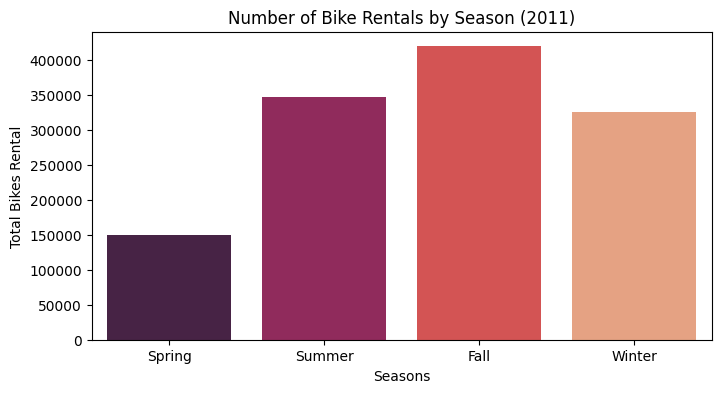

In [96]:
plt.figure(figsize=(8, 4))
sns.barplot(x='season_name', y='cnt', data=season_rentals, palette='rocket')
plt.title('Number of Bike Rentals by Season (2011)')
plt.xlabel('Seasons')
plt.ylabel('Total Bikes Rental')

### Pertanyaan 2:

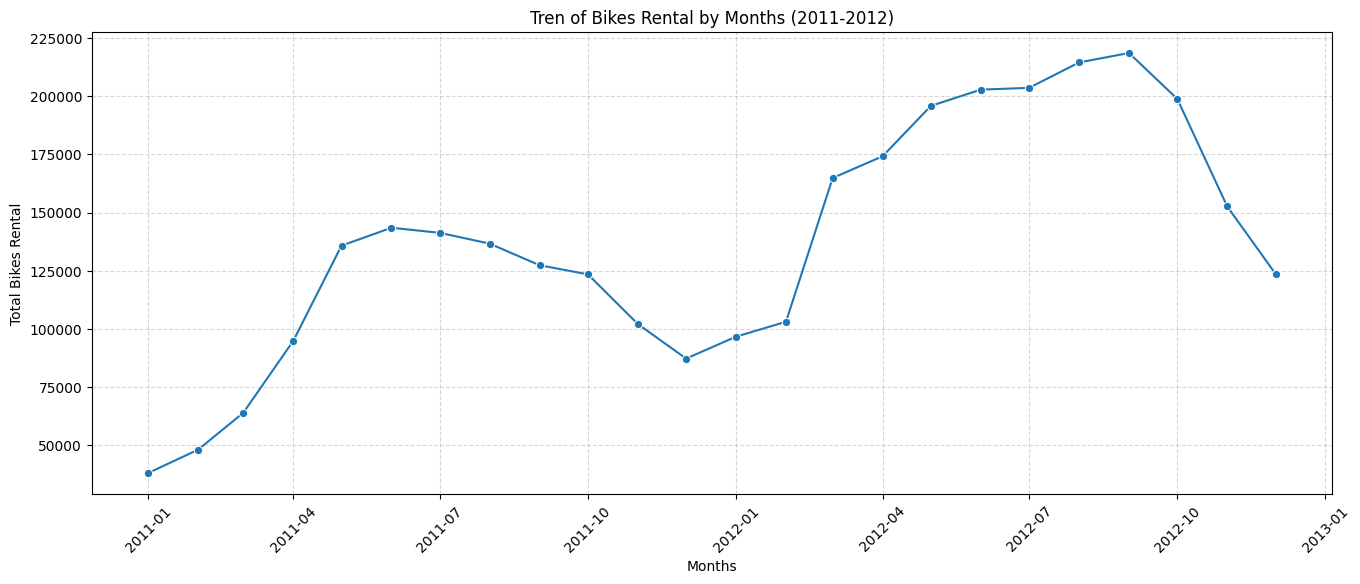

In [101]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='dteday', y='cnt', data=monthly_rentals, marker='o')

plt.title('Tren of Bikes Rental by Months (2011-2012)')
plt.xlabel('Months')
plt.ylabel('Total Bikes Rental')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

**Insight:**
- Lewat bar chart pada Business Case 1, kita dapat melihat bahwa rental sepeda paling banyak diminati di musim "Fall", diikuti oleh musim "Summer", "Winter", dan "Spring"
- Lewat line chart pada Business Case 2, kita dapat melihat tren yang fluktuatif tapi positif karena terus bertambahnya minat rental sepeda di tahun 2012 dibanding 2011

## Analisis Lanjutan (Opsional)

## Conclusion

- Kesimpulan dari Business Case pertama adalah musim yang paling efektif untuk mengiklankan rental sepeda adalah musim "Fall" atau musim gugur.
- Kesimpulan dari Business Case kedua adalah tren minat rental sepeda naik dari tahun 2011 ke tahun 2012 sehingga oke jika ingin membuka bisnis yang sama sebagai pesaing.